# Multiclass Classification

In [1]:
import pandas as pd
df = pd.read_csv("mnist_train.csv")
df.head()

x= df.drop(columns = 'label')
y = df['label']

# scale x values
x_scaled = x/255

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=42)

In [3]:
# Building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import BatchNormalization

2024-08-06 03:41:03.503593: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 03:41:03.536764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-08-06 03:41:05.371322: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1")) 

model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [8]:
784*256 + 256

200960

In [10]:
257*10

2570

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normalization1 (BatchNorma  (None, 784)               3136      
 lization)                                                       
                                                                 
 hidden_layer1 (Dense)       (None, 256)               200960    
                                                                 
 Normalization2 (BatchNorma  (None, 256)               1024      
 lization)                                                       
                                                                 
 output_Layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 207690 (811.29 KB)
Trainable params: 205610 (803.16 KB)
Non-trainable params: 2080 (8.12 KB)
_________________________________________________________________


In [ ]:
#784 * gamma and beta - learnable parameter 
#non - trainable - Mew and Sigma
#every node have 4 parameter

In [6]:
model.layers[1].weights

[<tf.Variable 'hidden_layer1/kernel:0' shape=(784, 256) dtype=float32, numpy=
 array([[ 0.01296166,  0.0011299 , -0.04611672, ..., -0.06583582,
         -0.05889314, -0.05151366],
        [-0.03590947,  0.04897627,  0.06528419, ...,  0.01335482,
          0.03418455, -0.03742728],
        [ 0.07489917, -0.04155811,  0.00920914, ...,  0.0594783 ,
          0.0587766 ,  0.03332589],
        ...,
        [-0.0367588 ,  0.00315017, -0.01627975, ..., -0.04290641,
          0.04224247, -0.06846727],
        [ 0.07482821,  0.01853561,  0.06657313, ...,  0.04734252,
         -0.049551  ,  0.06477378],
        [-0.00527948,  0.06240861,  0.01914053, ..., -0.00944092,
         -0.01912055, -0.06257803]], dtype=float32)>,
 <tf.Variable 'hidden_layer1/bias:0' shape=(256,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [26]:
for i in model.layers:
    print(i.weights)

[<tf.Variable 'Normalization1/gamma:0' shape=(784,) dtype=float32, numpy=
array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0286956 , 0.84014696, 0.86903185,
       1.0460128 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.97085136, 1.0201792 , 0.88386047,
       1.0039984 , 0.99432856, 1.020087  , 1.0215758 , 0.8591868 ,
       0.84999365, 0.8811203 , 0.67939407, 0.8186133 , 1.0624342 ,
       0.9967316 , 0.9611442 , 0.975781  , 1.111766  , 1.2533008 ,
       0.7615803 , 1.1231816 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.256095  ,
       1.1051891 , 1.1569287 , 1.0967126 , 0.78799105, 1.154709  ,
       1.2304862 , 1.0885193 , 1.0759044 , 1.0078888 , 

In [15]:
!pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [20]:
x_train.shape

(45000, 784)

In [15]:
45000/32

1406.25

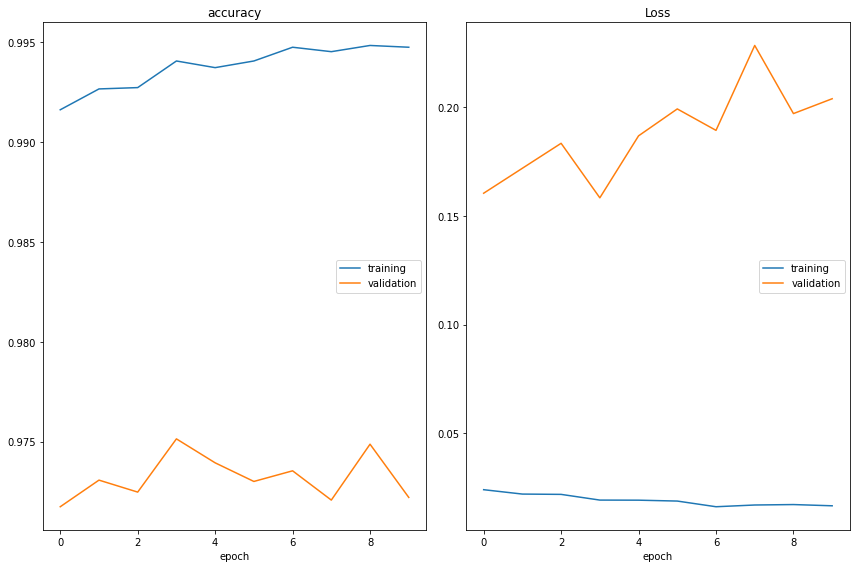

accuracy
	training         	 (min:    0.992, max:    0.995, cur:    0.995)
	validation       	 (min:    0.972, max:    0.975, cur:    0.972)
Loss
	training         	 (min:    0.016, max:    0.024, cur:    0.017)
	validation       	 (min:    0.158, max:    0.229, cur:    0.204)
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.2040 - val_accuracy: 0.9722


In [21]:
# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])

In [28]:
#Regularization


In [29]:

model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1",kernel_regularizer="l2")) 

model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

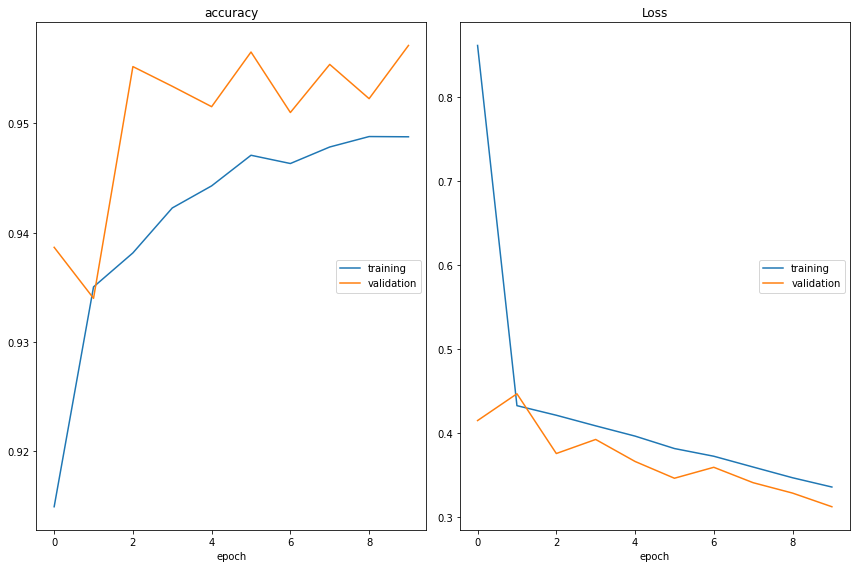

accuracy
	training         	 (min:    0.915, max:    0.949, cur:    0.949)
	validation       	 (min:    0.934, max:    0.957, cur:    0.957)
Loss
	training         	 (min:    0.336, max:    0.861, cur:    0.336)
	validation       	 (min:    0.312, max:    0.447, cur:    0.312)
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3356 - accuracy: 0.9488 - val_loss: 0.3121 - val_accuracy: 0.9571


In [30]:
# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])

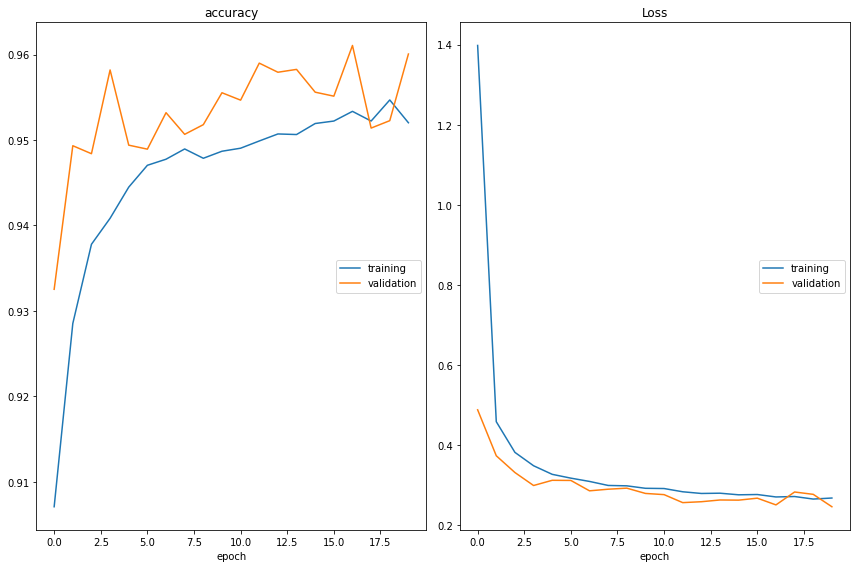

accuracy
	training         	 (min:    0.907, max:    0.955, cur:    0.952)
	validation       	 (min:    0.933, max:    0.961, cur:    0.960)
Loss
	training         	 (min:    0.266, max:    1.398, cur:    0.268)
	validation       	 (min:    0.247, max:    0.489, cur:    0.247)
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2684 - accuracy: 0.9520 - val_loss: 0.2466 - val_accuracy: 0.9601


In [32]:
model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1",kernel_regularizer="l2")) 
model.add(Dense(units=256,activation='relu',name ="hidden_layer2",kernel_regularizer="l2")) 

model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])

In [9]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [40]:
help(l1)

Help on class L1 in module keras.src.regularizers:

class L1(Regularizer)
 |  L1(l1=0.01, **kwargs)
 |  
 |  A regularizer that applies a L1 regularization penalty.
 |  
 |  The L1 regularization penalty is computed as:
 |  `loss = l1 * reduce_sum(abs(x))`
 |  
 |  L1 may be passed to a layer as a string identifier:
 |  
 |  >>> dense = tf.keras.layers.Dense(3, kernel_regularizer='l1')
 |  
 |  In this case, the default value used is `l1=0.01`.
 |  
 |  Arguments:
 |      l1: Float; L1 regularization factor.
 |  
 |  Method resolution order:
 |      L1
 |      Regularizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x)
 |      Compute a regularization penalty from an input tensor.
 |  
 |  __init__(self, l1=0.01, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_config(self)
 |      Returns the config of the regularizer.
 |      
 |      An regularizer config is a Python dictionary (serializable)
 |      cont

In [41]:
reg = l1(l1=0.1)

In [42]:
reg = l2(l2=0.1)

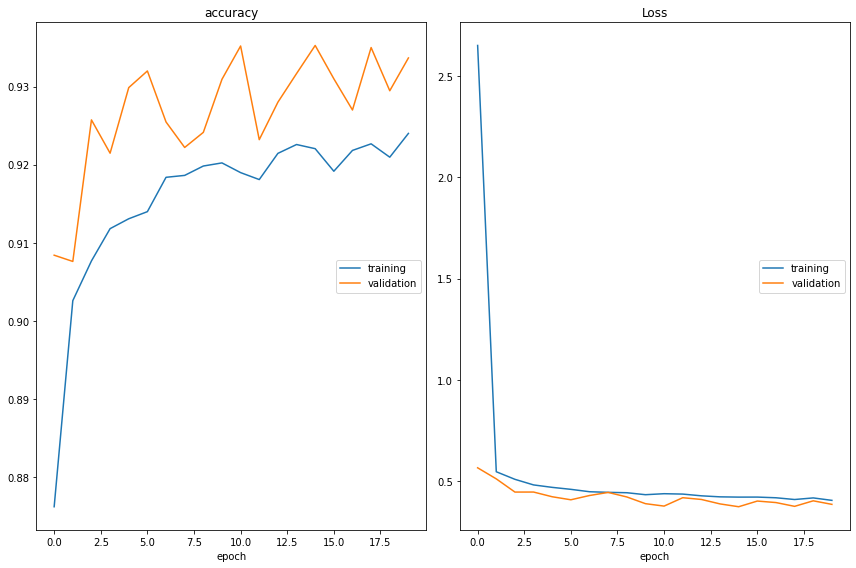

accuracy
	training         	 (min:    0.876, max:    0.924, cur:    0.924)
	validation       	 (min:    0.908, max:    0.935, cur:    0.934)
Loss
	training         	 (min:    0.407, max:    2.650, cur:    0.407)
	validation       	 (min:    0.375, max:    0.567, cur:    0.387)
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4065 - accuracy: 0.9240 - val_loss: 0.3868 - val_accuracy: 0.9337


In [43]:
model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1",kernel_regularizer=reg)) 
model.add(Dense(units=256,activation='relu',name ="hidden_layer2",kernel_regularizer=reg)) 

model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])

In [12]:
# Dropout
from tensorflow.keras.layers import Dropout

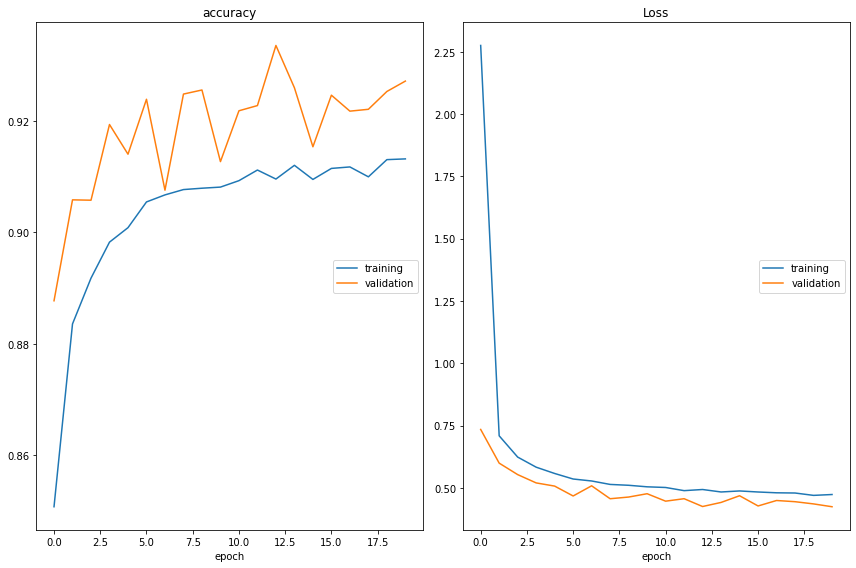

accuracy
	training         	 (min:    0.851, max:    0.913, cur:    0.913)
	validation       	 (min:    0.888, max:    0.934, cur:    0.927)
Loss
	training         	 (min:    0.470, max:    2.275, cur:    0.473)
	validation       	 (min:    0.424, max:    0.735, cur:    0.424)
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4734 - accuracy: 0.9132 - val_loss: 0.4244 - val_accuracy: 0.9272


In [45]:
reg = l2(l2=0.1)
model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1",kernel_regularizer=reg)) 
model.add(Dense(units=256,activation='relu',name ="hidden_layer2",kernel_regularizer=reg)) 

#Dropout
model.add(Dropout(0.20,name="Dropout1"))

#model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])

In [13]:
#Early stopping

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss",patience=4,restore_best_weights=True,min_delta=0.01) # 5 maximum patience


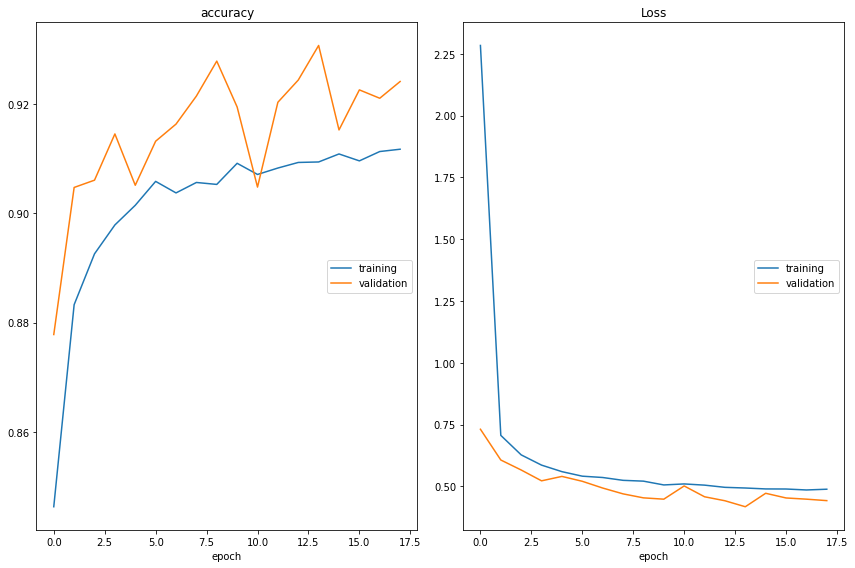

accuracy
	training         	 (min:    0.846, max:    0.912, cur:    0.912)
	validation       	 (min:    0.878, max:    0.931, cur:    0.924)
Loss
	training         	 (min:    0.485, max:    2.284, cur:    0.488)
	validation       	 (min:    0.418, max:    0.731, cur:    0.442)
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4885 - accuracy: 0.9117 - val_loss: 0.4423 - val_accuracy: 0.9241


In [14]:
reg = l2(l2=0.1)
model = Sequential()
model.add(Input(shape=(784,),name="input_layer"))

# adding batch normalization layer
model.add(BatchNormalization(name="Normalization1"))

model.add(Dense(units=256,activation='relu',name ="hidden_layer1",kernel_regularizer=reg)) 
model.add(Dense(units=256,activation='relu',name ="hidden_layer2",kernel_regularizer=reg)) 

#Dropout
model.add(Dropout(0.20,name="Dropout1"))

#model.add(BatchNormalization(name="Normalization2"))

model.add(Dense(units=10,activation='softmax',name="output_Layer"))

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Train the model
from livelossplot import PlotLossesKerasTF
model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF(),es])

In [15]:
# Loading an image and applying model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
pic = load_img("digit.png")

FileNotFoundError: [Errno 2] No such file or directory: 'digit.png'

In [ ]:
pic_array = img_to_array(pic)
new_data = pic_array.glatter()
model.predict(new_data)